In [1]:
"""
Created on Sunday Oct 18 13:21:09 2020

@author: aditioagungnugroho
"""

#Import and create pyspark
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722_Iteration4_anug012').getOrCreate()

In [2]:
#Load the CSV dataset into dataframe
df = spark.read.load("./mental-health-in-tech-company-2016.csv", format="csv", inferSchema = True, header=True)

In [3]:
#2.2 Data Description
df.printSchema()
print(df.count(), len(df.columns))

root
 |-- self_employed: string (nullable = true)
 |-- no_employees: string (nullable = true)
 |-- tech_company: string (nullable = true)
 |-- role: string (nullable = true)
 |-- health_coverage: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- mental_health_discussion: string (nullable = true)
 |-- seek_help: string (nullable = true)
 |-- anonymity: string (nullable = true)
 |-- leave: string (nullable = true)
 |-- mental_health_consequence: string (nullable = true)
 |-- phys_health_consequence: string (nullable = true)
 |-- coworkers: string (nullable = true)
 |-- supervisor: string (nullable = true)
 |-- mental_vs_physical: string (nullable = true)
 |-- obs_consequence: string (nullable = true)
 |-- medical_coverage: string (nullable = true)
 |-- resources: string (nullable = true)
 |-- client_revelation: string (nullable = true)
 |-- client_revelation_consequence: string (nullable = true)
 |-- coworkers_revelation: string (nullable = true)
 |-- coworkers_re

In [4]:
#2.4.1 Missing Data
#Count the null values and missing data
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------------+------------+------------+----+---------------+------------+------------------------+---------+---------+-----+-------------------------+-----------------------+---------+----------+------------------+---------------+----------------+---------+-----------------+-----------------------------+--------------------+--------------------------------+------------+-----------------------+---------------------+----------------------------+-----------------------+------------------------------+------+--------------+-----+---------------------+--------------+------------+-----------------+--------------+---------------+---------+--------------+---------+--------------+-----------------+----------------+---+------+-------+-----+------------+----------+--------+-----------+
|self_employed|no_employees|tech_company|role|health_coverage|care_options|mental_health_discussion|seek_help|anonymity|leave|mental_health_consequence|phys_health_consequence|coworkers|supervisor|mental_vs_physic

In [5]:
#2.4.1 Missing Data
#Count the null values and missing data

from pyspark.sql.functions import col
for col in df.columns:
    print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

self_employed 	 with null values:  0
no_employees 	 with null values:  291
tech_company 	 with null values:  292
role 	 with null values:  1176
health_coverage 	 with null values:  295
care_options 	 with null values:  297
mental_health_discussion 	 with null values:  297
seek_help 	 with null values:  294
anonymity 	 with null values:  297
leave 	 with null values:  299
mental_health_consequence 	 with null values:  300
phys_health_consequence 	 with null values:  301
coworkers 	 with null values:  297
supervisor 	 with null values:  298
mental_vs_physical 	 with null values:  294
obs_consequence 	 with null values:  295
medical_coverage 	 with null values:  1152
resources 	 with null values:  1152
client_revelation 	 with null values:  1152
client_revelation_consequence 	 with null values:  1156
coworkers_revelation 	 with null values:  1154
coworkers_revelation_consequence 	 with null values:  1157
productivity 	 with null values:  1154
productivity_precentage 	 with null values:  1

In [6]:
#Error Value
#Creat temporary view of the DataFrame
df.createOrReplaceTempView('mental_health')
#Search for unique value of phys_health_interview_reason
interviewReasonResults = spark.sql("SELECT DISTINCT phys_health_interview_reason FROM mental_health ORDER BY phys_health_interview_reason DESC")
interviewReasonResults.show()

+----------------------------+
|phys_health_interview_reason|
+----------------------------+
|                         xxx|
|        would only bring ...|
|        would be afraid n...|
|        what if it was th...|
|        unless it's visib...|
|        unless it would d...|
|        unless it directl...|
|         to get accomodation|
|        they would hold i...|
|        they might think ...|
|        they might think ...|
|        there's no stigma...|
|        there's no stigma...|
|        the world isn't a...|
|        simply because it...|
|                 seems wrong|
|        physical health i...|
|        physical health i...|
|        physical health i...|
|        personal info sho...|
+----------------------------+
only showing top 20 rows



In [7]:
#Measurement Error
#Search for unique value of no_employees
noEmployeesResults = spark.sql("SELECT DISTINCT no_employees FROM mental_health")
noEmployeesResults.show()

+--------------------+
|        no_employees|
+--------------------+
|    mobility issues)|
| plenty of other ...|
| and as such one ...|
|                null|
|             100-500|
| I try to judge w...|
|              Jun-25|
|   I think it would"|
|               Maybe|
|Yes, I think it w...|
| he was a ""maste...|
|             sisters|
| and they don't k...|
|                  No|
|            500-1000|
| in which case I ...|
| and had people i...|
|               1-May|
|      More than 1000|
| I don't think it...|
+--------------------+
only showing top 20 rows



In [8]:
#Coding Inconsistencies
#Search for unique value of gender
genderResults = spark.sql("SELECT DISTINCT gender FROM mental_health")
genderResults.show()

+--------------------+
|              gender|
+--------------------+
|                AFAB|
|Female assigned a...|
|                  fm|
|          non-binary|
|                   F|
|                  34|
|         Genderqueer|
|                 mtf|
|female-bodied; no...|
|                  28|
|                 man|
|           Sometimes|
|                 Man|
|                  35|
|            Cis male|
|         genderqueer|
|                   m|
|             Female |
|I'm a man why did...|
|Female (props for...|
+--------------------+
only showing top 20 rows



In [9]:
"""
3. Data Preparation
3.1 Data Selection
"""

df_selection = df.drop(*["phys_health_interview", "phys_health_interview_reason", 
                                        "mental_health_interview", "mental_health_interview_reason",
                                        "career", "seek_help", "phys_health_consequence",
                                        "obs_consequence", "obs_mental_discussion"])
df_selection.columns

['self_employed',
 'no_employees',
 'tech_company',
 'role',
 'health_coverage',
 'care_options',
 'mental_health_discussion',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'coworkers',
 'supervisor',
 'mental_vs_physical',
 'medical_coverage',
 'resources',
 'client_revelation',
 'client_revelation_consequence',
 'coworkers_revelation',
 'coworkers_revelation_consequence',
 'productivity',
 'productivity_precentage',
 'coworkers_view',
 'share',
 'family_history',
 'self_history',
 'current_condition',
 'condition_type',
 'condition_guess',
 'diagnosed',
 'diagnosed_type',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'gender',
 'country',
 'state',
 'work_country',
 'work_state',
 'position',
 'remote_work']

In [10]:
#3.1 Data Selection (cont.)

df_selection2 = df_selection.drop(*['anonymity', 'care_options', 'mental_vs_physical'])
df_selection2.columns

['self_employed',
 'no_employees',
 'tech_company',
 'role',
 'health_coverage',
 'mental_health_discussion',
 'leave',
 'mental_health_consequence',
 'coworkers',
 'supervisor',
 'medical_coverage',
 'resources',
 'client_revelation',
 'client_revelation_consequence',
 'coworkers_revelation',
 'coworkers_revelation_consequence',
 'productivity',
 'productivity_precentage',
 'coworkers_view',
 'share',
 'family_history',
 'self_history',
 'current_condition',
 'condition_type',
 'condition_guess',
 'diagnosed',
 'diagnosed_type',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'gender',
 'country',
 'state',
 'work_country',
 'work_state',
 'position',
 'remote_work']

In [11]:
#3.1 Data Selection (cont.)

df_selection3 = df_selection2.drop(*['role', 'medical_coverage', 'resources', 'client_revelation', 
                                              'client_revelation_consequence', 'coworkers_revelation', 
                                              'coworkers_revelation_consequence', 'productivity', 
                                              'productivity_precentage', 'condition_guess', 'condition_type', 
                                              'diagnosed_type', 'state', 'work_state', 'work_country', 'country'])
df_selection3.columns

['self_employed',
 'no_employees',
 'tech_company',
 'health_coverage',
 'mental_health_discussion',
 'leave',
 'mental_health_consequence',
 'coworkers',
 'supervisor',
 'coworkers_view',
 'share',
 'family_history',
 'self_history',
 'current_condition',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'gender',
 'position',
 'remote_work']

In [12]:
#Count the null values and missing data
for col in df_selection3.columns:
    print(col, "\t", "with null values: ", df_selection3.filter(df_selection3[col].isNull()).count())

self_employed 	 with null values:  0
no_employees 	 with null values:  291
tech_company 	 with null values:  292
health_coverage 	 with null values:  295
mental_health_discussion 	 with null values:  297
leave 	 with null values:  299
mental_health_consequence 	 with null values:  300
coworkers 	 with null values:  297
supervisor 	 with null values:  298
coworkers_view 	 with null values:  41
share 	 with null values:  41
family_history 	 with null values:  45
self_history 	 with null values:  42
current_condition 	 with null values:  42
diagnosed 	 with null values:  52
treatment 	 with null values:  49
work_interfere 	 with null values:  41
success_treatment 	 with null values:  42
failed_treatment 	 with null values:  41
age 	 with null values:  41
gender 	 with null values:  41
position 	 with null values:  43
remote_work 	 with null values:  42


In [13]:
"""
3.2 Data Cleaning
3.2.1 Remove Missing Values
"""
#Remove null values
df_cleaning = df_selection3.na.drop()

#Show current values count
from pyspark.sql.functions import isnan, when, count, col
df_cleaning.describe().filter(col("summary") == "count").show()

#Count the null values and missing data
for col in df_cleaning.columns:
    print(col, "\t", "with null values: ", df_cleaning.filter(df_cleaning[col].isNull()).count())

+-------+-------------+------------+------------+---------------+------------------------+-----+-------------------------+---------+----------+--------------+-----+--------------+------------+-----------------+---------+---------+--------------+-----------------+----------------+----+------+--------+-----------+
|summary|self_employed|no_employees|tech_company|health_coverage|mental_health_discussion|leave|mental_health_consequence|coworkers|supervisor|coworkers_view|share|family_history|self_history|current_condition|diagnosed|treatment|work_interfere|success_treatment|failed_treatment| age|gender|position|remote_work|
+-------+-------------+------------+------------+---------------+------------------------+-----+-------------------------+---------+----------+--------------+-----+--------------+------------+-----------------+---------+---------+--------------+-----------------+----------------+----+------+--------+-----------+
|  count|         1118|        1118|        1118|         

In [14]:
"""
3.2.2 Data Errors and Code Inconsistencies Correction
"""

#Gender data correction
df_cleaning.select('gender').distinct().show(100, False)

+-------------------------------------------------------+
|gender                                                 |
+-------------------------------------------------------+
|Female assigned at birth                               |
|fm                                                     |
|non-binary                                             |
|F                                                      |
|Genderqueer                                            |
|female-bodied; no feelings about gender                |
|28                                                     |
|man                                                    |
|Man                                                    |
|Cis male                                               |
|genderqueer                                            |
|m                                                      |
|Female                                                 |
|Female (props for making this a freeform field, though)|
|Agender      

In [15]:
#Gender data correction (cont.)
from pyspark.sql.functions import col, udf
import pyspark.sql.functions as f 

female = ['f', 'F', 'fem', 'Female', 'Cis female', 'Cis-woman', 'Cisgender Female', 'female ', 'Female ',
          'Female (props for making this a freeform field, though)', 'Female assigned at birth ',
          'Female or Multi-Gender Femme', 'female-bodied; no feelings about gender', 'female/woman',
          'fm', 'I identify as female.', ' Female', 'genderqueer woman', 'Woman', 'woman', 'Cis female ']
male = ['cis male', 'Cis male', 'cis man', 'cisdude', 'Dude', 'm', 'M', 'M|', 'mail', 'Male', 'MALE',
        'Male (cis)', 'Male (trans, FtM)', 'male 9:1 female, roughly', 'Male.', 'Male/genderqueer', 'Male ',
        'male ', 'Cis Male', 'Malr', 'man', 'Man', 'Sex is male', 
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "]
other = ['Bigender', 'non-binary', 'Transitioned, M2F', 'Genderfluid (born female)', 'Other/Transfeminine',
          'Androgynous', 'Other', 'nb masculine', 'none of your business', 'genderqueer', 'Human', 'Genderfluid',
          'Enby', 'Queer', 'Agender', 'Nonbinary', 'Genderqueer', 'Genderflux demi-girl', 'Transgender woman', '28', 'N/A']

df_correction = df_cleaning.withColumn('gender',f.when(f.col('gender').isin(male),f.lit('male')).\
when(f.col('gender').isin(other),f.lit('other')).\
when(f.col('gender').isin(female),f.lit('female')).\
otherwise(f.col('gender')))
df_correction = df_correction.where("age!='Sometimes'")

df_correction.select('gender').distinct().show()

+------+
|gender|
+------+
|female|
| other|
|  male|
+------+



In [16]:
#Describe the age column
df_correction.select('age').distinct().show()
df_correction.select('age').describe().show()

+---+
|age|
+---+
| 51|
| 54|
|323|
| 29|
| 42|
|  3|
| 30|
| 34|
| 59|
| 28|
| 22|
| 35|
| 52|
| 47|
| 99|
| 43|
| 31|
| 70|
| 27|
| 61|
+---+
only showing top 20 rows

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              1117|
|   mean|33.754700089525514|
| stddev|11.797681710809933|
|    min|                17|
|    max|                99|
+-------+------------------+



In [17]:
#Age data correction
import pyspark.sql.functions as f

df_correction2 = df_correction.withColumn(
  "age",
  f.when(
    (f.col("age") >= 13) & 
    (f.col("age") <= 65), f.col("age")).otherwise(f.lit(None))
)

#Drop the null value
df_correction2 = df_correction2.dropna()

df_correction2.describe([ "age" ]).show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              1111|
|   mean| 33.36543654365437|
| stddev|7.4931580060647685|
|    min|                17|
|    max|                63|
+-------+------------------+



In [18]:
'''
3.2.3 Measurement Errors Correction
'''
#Employees data correction
df_correction3 = df_correction2.withColumn(
    "no_employees",
    f.when(
        f.col("no_employees") == "Jun-25", f.lit("6-25")).\
    when(
        f.col("no_employees") == "1-May", f.lit("1-5")).\
    when(
        f.col("no_employees") == "More than 1000", f.lit(">1000")).otherwise(f.col("no_employees"))
)
df_correction3.select("no_employees").distinct().show()

+------------+
|no_employees|
+------------+
|       >1000|
|     100-500|
|    500-1000|
|      26-100|
|         1-5|
|        6-25|
+------------+



In [19]:
df_correction3.columns

['self_employed',
 'no_employees',
 'tech_company',
 'health_coverage',
 'mental_health_discussion',
 'leave',
 'mental_health_consequence',
 'coworkers',
 'supervisor',
 'coworkers_view',
 'share',
 'family_history',
 'self_history',
 'current_condition',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'gender',
 'position',
 'remote_work']

In [20]:
'''
3.3 Data Construction
'''
#Format position data
df_construction = df_correction3.withColumn(
    "position",
    f.when(
        f.col("position") == "Supervisor", f.lit(1)).otherwise(0)
)
df_construction.select("position").show()

+--------+
|position|
+--------+
|       0|
|       0|
|       0|
|       1|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       1|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
+--------+
only showing top 20 rows



In [21]:
#Format diagnosed data
df_construction = df_construction.withColumn(
    "diagnosed",
    f.when(
        f.col("diagnosed") == "Yes", f.lit(1)).otherwise(0)
)
df_construction.select("diagnosed").show()

+---------+
|diagnosed|
+---------+
|        1|
|        1|
|        0|
|        1|
|        0|
|        0|
|        1|
|        1|
|        1|
|        1|
|        1|
|        0|
|        1|
|        1|
|        1|
|        0|
|        1|
|        0|
|        0|
|        0|
+---------+
only showing top 20 rows



In [22]:
#Format mental health discussion data
df_construction = df_construction.withColumn(
    "mental_health_discussion",
    f.when(
        f.col("mental_health_discussion") == "No", f.lit(0)).\
    when(
        f.col("mental_health_discussion") == "Yes", f.lit(1)).\
    when(
        f.col("mental_health_discussion") == "I don't know", f.lit(2)).otherwise(3)
)
df_construction.select("mental_health_discussion").distinct().show()

#Format mental health consequences data
df_construction = df_construction.withColumn(
    "mental_health_consequence",
    f.when(
        f.col("mental_health_consequence") == "No", f.lit(0)).\
    when(
        f.col("mental_health_consequence") == "Yes", f.lit(1)).\
    when(
        f.col("mental_health_consequence") == "Maybe", f.lit(2)).otherwise(3)
)
df_construction.select("mental_health_consequence").distinct().show()

+------------------------+
|mental_health_discussion|
+------------------------+
|                       1|
|                       2|
|                       0|
+------------------------+

+-------------------------+
|mental_health_consequence|
+-------------------------+
|                        1|
|                        2|
|                        0|
+-------------------------+



In [23]:
#Format coworkers data
df_construction = df_construction.withColumn(
    "coworkers",
    f.when(
        f.col("coworkers") == "No", f.lit(0)).\
    when(
        f.col("coworkers") == "Yes", f.lit(1)).\
    when(
        f.col("coworkers") == "Maybe", f.lit(2)).otherwise(3)
)
df_construction.select("coworkers").distinct().show()

#Format supervisor data
df_construction = df_construction.withColumn(
    "supervisor",
    f.when(
        f.col("supervisor") == "No", f.lit(0)).\
    when(
        f.col("supervisor") == "Yes", f.lit(1)).\
    when(
        f.col("supervisor") == "Maybe", f.lit(2)).otherwise(3)
)
df_construction.select("supervisor").distinct().show()

+---------+
|coworkers|
+---------+
|        1|
|        2|
|        0|
+---------+

+----------+
|supervisor|
+----------+
|         1|
|         2|
|         0|
+----------+



In [24]:
#Format family history data
df_construction = df_construction.withColumn(
    "family_history",
    f.when(
        f.col("family_history") == "No", f.lit(0)).\
    when(
        f.col("family_history") == "Yes", f.lit(1)).\
    when(
        f.col("family_history") == "I don't know", f.lit(2)).otherwise(3)
)
df_construction.select("family_history").distinct().show()

#Format self history data
df_construction = df_construction.withColumn(
    "self_history",
    f.when(
        f.col("self_history") == "No", f.lit(0)).\
    when(
        f.col("self_history") == "Yes", f.lit(1)).\
    when(
        f.col("self_history") == "Maybe", f.lit(2)).otherwise(3)
)
df_construction.select("self_history").distinct().show()

#Format current condition data
df_construction = df_construction.withColumn(
    "current_condition",
    f.when(
        f.col("current_condition") == "No", f.lit(0)).\
    when(
        f.col("current_condition") == "Yes", f.lit(1)).\
    when(
        f.col("current_condition") == "Maybe", f.lit(2)).otherwise(3)
)
df_construction.select("current_condition").distinct().show()

+--------------+
|family_history|
+--------------+
|             1|
|             2|
|             0|
+--------------+

+------------+
|self_history|
+------------+
|           1|
|           2|
|           0|
+------------+

+-----------------+
|current_condition|
+-----------------+
|                1|
|                2|
|                0|
+-----------------+



In [25]:
#Format gender data
df_construction = df_construction.withColumn(
    "gender",
    f.when(
        f.col("gender") == "female", f.lit(0)).\
    when(
        f.col("gender") == "male", f.lit(1)).\
    when(
        f.col("gender") == "other", f.lit(2)).otherwise(3)
)
df_construction.select("gender").distinct().show()

#Format remote work data
df_construction = df_construction.withColumn(
    "remote_work",
    f.when(
        f.col("remote_work") == "Never", f.lit(0)).\
    when(
        f.col("remote_work") == "Sometimes", f.lit(1)).\
    when(
        f.col("remote_work") == "Always", f.lit(2)).otherwise(3)
)
df_construction.select("remote_work").distinct().show()

+------+
|gender|
+------+
|     1|
|     2|
|     0|
+------+

+-----------+
|remote_work|
+-----------+
|          1|
|          2|
|          0|
+-----------+



In [26]:
#Format health coverage data
df_construction = df_construction.withColumn(
    "health_coverage",
    f.when(
        f.col("health_coverage") == "No", f.lit(0)).\
    when(
        f.col("health_coverage") == "Yes", f.lit(1)).\
    when(
        f.col("health_coverage") == "I don't know", f.lit(2)).otherwise(3)
)
df_construction.select("health_coverage").distinct().show()

+---------------+
|health_coverage|
+---------------+
|              1|
|              3|
|              2|
|              0|
+---------------+



In [27]:
#Format number of employees data
df_construction = df_construction.withColumn(
    "no_employees",
    f.when(
        f.col("no_employees") == "1-5", f.lit(0)).\
    when(
        f.col("no_employees") == "6-25", f.lit(1)).\
    when(
        f.col("no_employees") == "26-100", f.lit(2)).\
    when(
        f.col("no_employees") == "100-500", f.lit(3)).\
    when(
        f.col("no_employees") == "500-1000", f.lit(4)).otherwise(5)
)
df_construction.select("no_employees").distinct().show()

+------------+
|no_employees|
+------------+
|           1|
|           3|
|           5|
|           4|
|           2|
|           0|
+------------+



In [28]:
#Format leave data
df_construction = df_construction.withColumn(
    "leave",
    f.when(
        f.col("leave") == "I don't know", f.lit(0)).\
    when(
        f.col("leave") == "Very easy", f.lit(1)).\
    when(
        f.col("leave") == "Somewhat easy", f.lit(2)).\
    when(
        f.col("leave") == "Neither easy nor difficult", f.lit(3)).\
    when(
        f.col("leave") == "Somewhat difficult", f.lit(4)).otherwise(5)
)
df_construction.select("leave").distinct().show()

#Format coworkers view data
df_construction = df_construction.withColumn(
    "coworkers_view",
    f.when(
        f.col("coworkers_view") == "No, they do not", f.lit(0)).\
    when(
        f.col("coworkers_view") == "No, I don't think they would", f.lit(1)).\
    when(
        f.col("coworkers_view") == "Maybe", f.lit(2)).\
    when(
        f.col("coworkers_view") == "Yes, I think they would", f.lit(3)).otherwise(4)
)
df_construction.select("coworkers_view").distinct().show()

#Format share data
df_construction = df_construction.withColumn(
    "share",
    f.when(
        f.col("share") == "Not applicable to me (I do not have a mental illness)", f.lit(0)).\
    when(
        f.col("share") == "Not open at all", f.lit(1)).\
    when(
        f.col("share") == "Somewhat not open", f.lit(2)).\
    when(
        f.col("share") == "Neutral", f.lit(3)).\
    when(
        f.col("share") == "Somewhat open", f.lit(4)).otherwise(5)
)
df_construction.select("share").distinct().show()

+-----+
|leave|
+-----+
|    1|
|    3|
|    5|
|    4|
|    2|
|    0|
+-----+

+--------------+
|coworkers_view|
+--------------+
|             1|
|             3|
|             4|
|             2|
|             0|
+--------------+

+-----+
|share|
+-----+
|    1|
|    3|
|    5|
|    4|
|    2|
|    0|
+-----+



In [29]:
#Format work interfere data
df_construction = df_construction.withColumn(
    "work_interfere",
    f.when(
        f.col("work_interfere") == "Not applicable to me", f.lit(0)).\
    when(
        f.col("work_interfere") == "Never", f.lit(1)).\
    when(
        f.col("work_interfere") == "Rarely", f.lit(2)).\
    when(
        f.col("work_interfere") == "Sometimes", f.lit(3)).otherwise(4)
)
df_construction.select("work_interfere").distinct().show()

#Format success treatment data
df_construction = df_construction.withColumn(
    "success_treatment",
    f.when(
        f.col("success_treatment") == "Not applicable to me", f.lit(0)).\
    when(
        f.col("success_treatment") == "Never", f.lit(1)).\
    when(
        f.col("success_treatment") == "Rarely", f.lit(2)).\
    when(
        f.col("success_treatment") == "Sometimes", f.lit(3)).otherwise(4)
)
df_construction.select("success_treatment").distinct().show()

#Format failed treatment data
df_construction = df_construction.withColumn(
    "failed_treatment",
    f.when(
        f.col("failed_treatment") == "Not applicable to me", f.lit(0)).\
    when(
        f.col("failed_treatment") == "Never", f.lit(1)).\
    when(
        f.col("failed_treatment") == "Rarely", f.lit(2)).\
    when(
        f.col("failed_treatment") == "Sometimes", f.lit(3)).otherwise(4)
)
df_construction.select("failed_treatment").distinct().show()

+--------------+
|work_interfere|
+--------------+
|             1|
|             3|
|             4|
|             2|
|             0|
+--------------+

+-----------------+
|success_treatment|
+-----------------+
|                1|
|                3|
|                4|
|                2|
|                0|
+-----------------+

+----------------+
|failed_treatment|
+----------------+
|               1|
|               3|
|               4|
|               2|
|               0|
+----------------+



In [30]:
"""
3.5 Data Formatting
"""
df_transform = df_construction

df_transform.select(["no_employees", "age", "position", "remote_work"]).show()
df_transform = df_transform.sort(col("age").asc())
df_transform.select(["no_employees", "age", "position", "remote_work"]).show()

+------------+---+--------+-----------+
|no_employees|age|position|remote_work|
+------------+---+--------+-----------+
|           2| 39|       0|          1|
|           1| 29|       0|          0|
|           1| 38|       0|          2|
|           1| 43|       1|          1|
|           5| 42|       0|          1|
|           2| 30|       0|          1|
|           5| 37|       0|          2|
|           2| 44|       0|          1|
|           2| 28|       0|          0|
|           3| 34|       0|          1|
|           3| 30|       1|          2|
|           3| 44|       0|          1|
|           3| 35|       0|          2|
|           3| 52|       0|          1|
|           2| 32|       0|          2|
|           4| 34|       0|          0|
|           3| 31|       0|          1|
|           1| 26|       0|          1|
|           5| 35|       0|          0|
|           2| 25|       0|          1|
+------------+---+--------+-----------+
only showing top 20 rows

+------------+

In [31]:
df_transform.columns

['self_employed',
 'no_employees',
 'tech_company',
 'health_coverage',
 'mental_health_discussion',
 'leave',
 'mental_health_consequence',
 'coworkers',
 'supervisor',
 'coworkers_view',
 'share',
 'family_history',
 'self_history',
 'current_condition',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'gender',
 'position',
 'remote_work']

In [32]:
'''
#4 Data Transformation
#4.1.2 Ranking - Correlation matrix with Heatmap
'''
from pyspark.mllib.stat import Statistics
from pyspark import SparkContext, SparkConf
import seaborn as sns
import matplotlib.pyplot as plt
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

resultRDD = df_transform.rdd.map(lambda row: row[0:])
corrlation_matrix = Statistics.corr(resultRDD, method = 'pearson')
rdd0 = sc.parallelize(corrlation_matrix)
rdd1 = rdd0.map(lambda x: [float(i) for i in x])
corrlation_matrix[1]

plt.figure(figsize=(22,10))
sns.heatmap(corrlation_matrix, cmap="Purples", annot = True)
plt.show()

<Figure size 2200x1000 with 2 Axes>

In [33]:
#Selecting the data
df_select = df_transform.drop(*["self_employed", "tech_company", 
                                        "health_coverage", "mental_health_interview_reason",
                                        "mental_health_consequence", "coworkers", "supervisor",
                                        "coworkers_view", "family_history", "mental_health_discussion", "gender"])
df_select.columns

['no_employees',
 'leave',
 'share',
 'self_history',
 'current_condition',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'position',
 'remote_work']

In [34]:
#4.2 Project the Data
from pyspark.sql.types import IntegerType
df_project = df_select.withColumn("age", df_select["age"].cast(IntegerType()))
df_project = df_project.withColumn("treatment", df_project["treatment"].cast(IntegerType()))
df_project.printSchema()

df_project = df_project.withColumn(
    "age",
    f.when(
        (f.col("age") > 10) & (f.col("age") <= 20), f.lit(0)).\
    when(
        (f.col("age") > 20) & (f.col("age") <= 30), f.lit(1)).\
    when(
        (f.col("age") > 30) & (f.col("age") <= 40), f.lit(2)).\
    when(
        (f.col("age") > 40) & (f.col("age") <= 50), f.lit(3)).\
    when(
        (f.col("age") > 50) & (f.col("age") <= 60), f.lit(4)).otherwise(5)
)

df_project.select("age").show()
df_project.select("age").distinct().show()

root
 |-- no_employees: integer (nullable = false)
 |-- leave: integer (nullable = false)
 |-- share: integer (nullable = false)
 |-- self_history: integer (nullable = false)
 |-- current_condition: integer (nullable = false)
 |-- diagnosed: integer (nullable = false)
 |-- treatment: integer (nullable = true)
 |-- work_interfere: integer (nullable = false)
 |-- success_treatment: integer (nullable = false)
 |-- failed_treatment: integer (nullable = false)
 |-- age: integer (nullable = true)
 |-- position: integer (nullable = false)
 |-- remote_work: integer (nullable = false)

+---+
|age|
+---+
|  0|
|  0|
|  0|
|  0|
|  0|
|  0|
|  0|
|  0|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
|  1|
+---+
only showing top 20 rows

+---+
|age|
+---+
|  1|
|  3|
|  5|
|  4|
|  2|
|  0|
+---+



In [35]:
#combining atttributes into the of features and target is current_condition
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

current_columns = ['no_employees',
 'leave',
 'share',
 'self_history',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'position',
 'remote_work']

assembler_features = VectorAssembler(inputCols = current_columns, outputCol= "features")
labelIndexer = StringIndexer(inputCol = 'current_condition', outputCol= "label")
tmp = [assembler_features, labelIndexer]
pipeline = Pipeline(stages = tmp)

In [36]:
#Split data into training 80% and test 20%
fullData = pipeline.fit(df_project).transform(df_project)
fullData.cache()

dataTraining, dataTest = fullData.randomSplit([0.8, 0.2], seed=0)
print("Distribution of Positive and Negative in dataTraining is: ", dataTraining.groupBy("label").count().take(3))

Distribution of Positive and Negative in dataTraining is:  [Row(label=0.0, count=356), Row(label=1.0, count=337), Row(label=2.0, count=203)]


In [37]:
#Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier as DT
tree = DT(labelCol = "label", featuresCol = "features", maxDepth = 3)
tree_fit = tree.fit(dataTraining)
tree_transformed = tree_fit.transform(dataTest)

tree_fit.featureImportances

SparseVector(12, {3: 0.1106, 4: 0.1872, 6: 0.0166, 8: 0.6855})

In [38]:
#6.3.1 Decision Tree
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

tree_results = tree_transformed.select(['probability', 'label'])

tree_results_collect = tree_results.collect()
tree_results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in tree_results_collect]

tree_scoreAndLabels = sc.parallelize(tree_results_list)
tree_metrics = metric(tree_scoreAndLabels)
print("The ROC score is: ", tree_metrics.areaUnderROC)
# Area under precision-recall curve
print("Area under PR = %s" % tree_metrics.areaUnderPR)

from sklearn.metrics import classification_report, confusion_matrix
y_true = tree_transformed.select(['label']).collect()
y_pred = tree_transformed.select(['prediction']).collect()
print(classification_report(y_true, y_pred))

The ROC score is:  0.7946846341006926
Area under PR = 0.7992428584636462
              precision    recall  f1-score   support

         0.0       0.81      0.64      0.71        78
         1.0       0.73      0.83      0.77        93
         2.0       0.53      0.57      0.55        44

    accuracy                           0.71       215
   macro avg       0.69      0.68      0.68       215
weighted avg       0.72      0.71      0.71       215



In [39]:
#Random Forest Classifer
from pyspark.ml.classification import RandomForestClassifier as RF
rf = RF(labelCol = "label", featuresCol = "features", numTrees = 200, maxDepth = 3)
fit = rf.fit(dataTraining)
transformed = fit.transform(dataTest)

fit.featureImportances

SparseVector(12, {0: 0.004, 1: 0.0078, 2: 0.0104, 3: 0.1853, 4: 0.2286, 5: 0.0309, 6: 0.0843, 7: 0.0931, 8: 0.351, 9: 0.0026, 10: 0.0008, 11: 0.0013})

In [40]:
#6.3.2 Random Forest
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

results = transformed.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]

scoreAndLabels = sc.parallelize(results_list)
metrics = metric(scoreAndLabels)
print("The ROC score is: ", metrics.areaUnderROC)
# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

from sklearn.metrics import classification_report, confusion_matrix
y_true = transformed.select(['label']).collect()
y_pred = transformed.select(['prediction']).collect()
print(classification_report(y_true, y_pred))

The ROC score is:  0.8147576268014227
Area under PR = 0.7763394938836933
              precision    recall  f1-score   support

         0.0       0.81      0.64      0.71        78
         1.0       0.71      0.90      0.79        93
         2.0       0.56      0.43      0.49        44

    accuracy                           0.71       215
   macro avg       0.69      0.66      0.66       215
weighted avg       0.71      0.71      0.70       215



In [41]:
#7 Data Mining
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier, NaiveBayes
from pyspark.ml import Pipeline

dtc = DecisionTreeClassifier(labelCol='label',featuresCol='features')
rfc = RandomForestClassifier(labelCol='label',featuresCol='features')
nb = NaiveBayes(labelCol='label',featuresCol='features')

dtc_model = dtc.fit(dataTraining)
rfc_model = rfc.fit(dataTraining)
nb_model = nb.fit(dataTraining)

dtc_predictions = dtc_model.transform(dataTest)
rfc_predictions = rfc_model.transform(dataTest)
nb_predictions = nb_model.transform(dataTest)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'label')
print("Decision Tree Classifier")
print(my_binary_eval.evaluate(dtc_predictions))

print("Random Forest Classifer")
print(my_binary_eval.evaluate(rfc_predictions))

my_binary_nb_eval = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='prediction')

print("Naive Bayes")
print(my_binary_nb_eval.evaluate(nb_predictions))

Decision Tree Classifier
0.7624461912783081
Random Forest Classifer
0.8021710649447875
Naive Bayes
0.7679674340258281


In [42]:
#7.2 Conduct Data Mining
#Evaluating Accuracy for all test model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
nb_acc = acc_evaluator.evaluate(nb_predictions)

print("Data Mining Model results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using Naive Bayes has an accuracy of: {0:2.2f}%'.format(nb_acc*100))

Data Mining Model results!
----------------------------------------
A single decision tree has an accuracy of: 71.63%
----------------------------------------
A random forest ensemble has an accuracy of: 72.09%
----------------------------------------
An ensemble using Naive Bayes has an accuracy of: 66.05%


In [43]:
#Decision Tree Features Important
from pyspark.ml.regression import DecisionTreeRegressor as DTR
dtr_tree = DTR(labelCol = "label", featuresCol = "features", maxDepth = 3)
dtr_tree_fit = dtr_tree.fit(dataTraining)
dtr_tree_transformed = dtr_tree_fit.transform(dataTest)

dtr_tree_fit.featureImportances

SparseVector(12, {0: 0.0178, 2: 0.0164, 3: 0.1585, 6: 0.0151, 8: 0.7784, 9: 0.0138})

In [44]:
#Decision Tree Evaluation
from pyspark.mllib.evaluation import RegressionMetrics as metric
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

dtr_results = dtr_tree_transformed.select(['features', 'label'])

dtr_results_collect = dtr_results.collect()
dtr_results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in dtr_results_collect]

dtr_scoreAndLabels = sc.parallelize(dtr_results_list)
dtr_metrics = metric(dtr_scoreAndLabels)
print("Mean Absolute Error is: ", dtr_metrics.meanAbsoluteError)
print("Mean Squared Error: ", dtr_metrics.meanSquaredError)
print("Root Mean Squared Error is: ", dtr_metrics.rootMeanSquaredError)
print("R2 is: ", dtr_metrics.r2)
print("Explained Variance is: ", dtr_metrics.explainedVariance)

Mean Absolute Error is:  2.5348837209302326
Mean Squared Error:  8.869767441860464
Root Mean Squared Error is:  2.9782154794205984
R2 is:  -15.35179867591928
Explained Variance is:  8.498366684694428


In [45]:
#Random Forest Feature Importances
from pyspark.ml.regression import RandomForestRegressor as RFR
rfr_tree = RFR(labelCol = "label", featuresCol = "features", maxDepth = 3)
rfr_tree_fit = rfr_tree.fit(dataTraining)
rfr_tree_transformed = rfr_tree_fit.transform(dataTraining)

rfr_tree_fit.featureImportances

SparseVector(12, {0: 0.0154, 1: 0.0135, 2: 0.0175, 3: 0.3425, 4: 0.03, 5: 0.0172, 6: 0.1221, 7: 0.1384, 8: 0.2927, 9: 0.007, 10: 0.0006, 11: 0.003})

In [46]:
#Random Forest Evaluation
from pyspark.mllib.evaluation import RegressionMetrics as metric
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

rfr_results = rfr_tree_transformed.select(['features', 'label'])

rfr_results_collect = rfr_results.collect()
rfr_results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in rfr_results_collect]

rfr_scoreAndLabels = sc.parallelize(rfr_results_list)
rfr_metrics = metric(rfr_scoreAndLabels)
print("Mean Absolute Error is: ", rfr_metrics.meanAbsoluteError)
print("Mean Squared Error: ", rfr_metrics.meanSquaredError)
print("Root Mean Squared Error is: ", rfr_metrics.rootMeanSquaredError)
print("R2 is: ", rfr_metrics.r2)
print("Explained Variance is: ", rfr_metrics.explainedVariance)

Mean Absolute Error is:  2.627232142857143
Mean Squared Error:  9.647321428571429
Root Mean Squared Error is:  3.1060137521542672
R2 is:  -15.221474275062565
Explained Variance is:  9.010417081871822


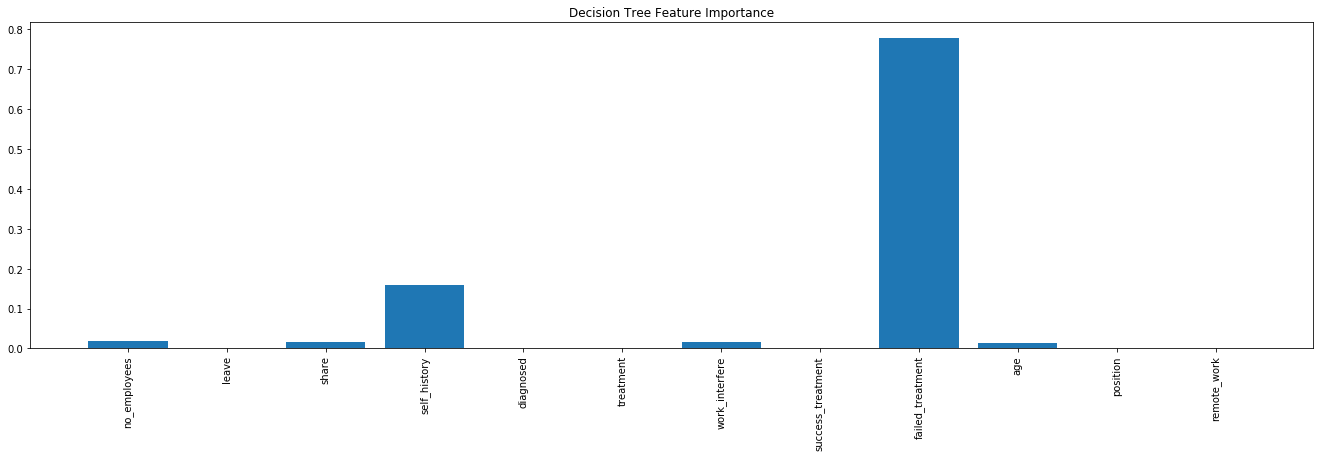

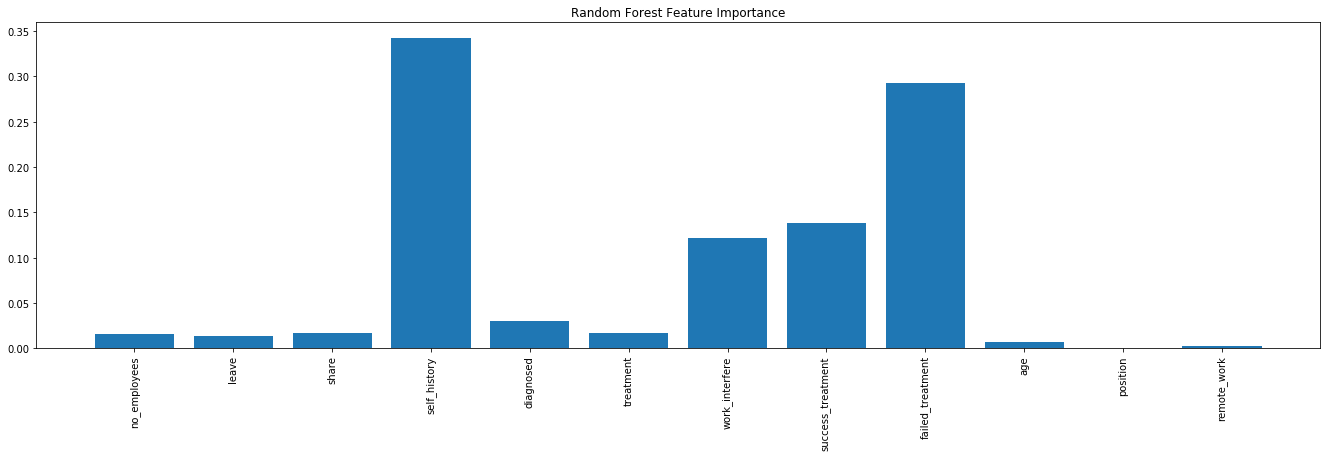

In [60]:
labels = ['no_employees',
 'leave',
 'share',
 'self_history',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'position',
 'remote_work']

#Decision Tree Features Important
from pyspark.ml.regression import DecisionTreeRegressor as DTR
dtr_tree = DTR(labelCol = "label", featuresCol = "features", maxDepth = 3)
dtr_tree_fit = dtr_tree.fit(dataTraining)
dtr_tree_transformed = dtr_tree_fit.transform(dataTest)

dtr_tree_fit.featureImportances

plt.figure(figsize=(23,6))
plt.bar(labels, dtr_tree_fit.featureImportances)
plt.xticks(rotation=90)
plt.title('Decision Tree Feature Importance')
plt.show(5)

#Random Forest Feature Importances
from pyspark.ml.regression import RandomForestRegressor as RFR
rfr_tree = RFR(labelCol = "label", featuresCol = "features", maxDepth = 3)
rfr_tree_fit = rfr_tree.fit(dataTraining)
rfr_tree_transformed = rfr_tree_fit.transform(dataTest)

rfr_tree_fit.featureImportances

plt.figure(figsize=(23,6))
plt.bar(labels, rfr_tree_fit.featureImportances)
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance')
plt.show(5)

In [47]:
feature_name = ['no_employees',
 'leave',
 'share',
 'self_history',
 'diagnosed',
 'treatment',
 'work_interfere',
 'success_treatment',
 'failed_treatment',
 'age',
 'position',
 'remote_work']

print(dtc_model.toDebugString)

index = 0 
for feature in feature_name:
    print(' feature ' + str(index) + " : " + feature_name[index])
    index += 1

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_48f78c6220297a024354) of depth 5 with 55 nodes
  If (feature 8 <= 0.0)
   If (feature 3 <= 0.0)
    If (feature 6 <= 3.0)
     If (feature 1 <= 3.0)
      If (feature 5 <= 0.0)
       Predict: 0.0
      Else (feature 5 > 0.0)
       Predict: 0.0
     Else (feature 1 > 3.0)
      If (feature 2 <= 2.0)
       Predict: 0.0
      Else (feature 2 > 2.0)
       Predict: 0.0
    Else (feature 6 > 3.0)
     Predict: 2.0
   Else (feature 3 > 0.0)
    If (feature 6 <= 0.0)
     If (feature 1 <= 4.0)
      If (feature 5 <= 0.0)
       Predict: 0.0
      Else (feature 5 > 0.0)
       Predict: 0.0
     Else (feature 1 > 4.0)
      If (feature 2 <= 0.0)
       Predict: 2.0
      Else (feature 2 > 0.0)
       Predict: 0.0
    Else (feature 6 > 0.0)
     If (feature 3 <= 1.0)
      If (feature 0 <= 1.0)
       Predict: 0.0
      Else (feature 0 > 1.0)
       Predict: 1.0
     Else (feature 3 > 1.0)
      Predict: 2.0
  Else (feature 8 > 0.0)


In [48]:
#ChiSqSelector

from pyspark.ml.feature import ChiSqSelector as CSS
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

selector = CSS(numTopFeatures=10, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="label")
selector_result = selector.fit(fullData)
selector_transformed = selector_result.transform(fullData)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
selector_transformed.show(10)

ChiSqSelector output with top 10 features selected
+------------+-----+-----+------------+-----------------+---------+---------+--------------+-----------------+----------------+---+--------+-----------+--------------------+-----+--------------------+
|no_employees|leave|share|self_history|current_condition|diagnosed|treatment|work_interfere|success_treatment|failed_treatment|age|position|remote_work|            features|label|    selectedFeatures|
+------------+-----+-----+------------+-----------------+---------+---------+--------------+-----------------+----------------+---+--------+-----------+--------------------+-----+--------------------+
|           1|    4|    1|           0|                0|        0|        0|             1|                1|               3|  0|       0|          2|[1.0,4.0,1.0,0.0,...|  0.0|[4.0,1.0,0.0,0.0,...|
|           5|    3|    2|           0|                0|        0|        0|             0|                0|               0|  0|       0|     

In [49]:
#Naive Bayes
from pyspark.ml.classification import NaiveBayes as NB
nb = NB(labelCol = "label", featuresCol = "features")
fit = nb.fit(dataTraining)
nb_predict = fit.transform(dataTest)

In [50]:
#6.3.3 Naive Bayes 
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

results = nb_predict.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]

scoreAndLabels = sc.parallelize(results_list)
metrics = metric(scoreAndLabels)
print("The ROC score is: ", metrics.areaUnderROC)
# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

from sklearn.metrics import classification_report, confusion_matrix
y_true = transformed.select(['label']).collect()
y_pred = transformed.select(['prediction']).collect()
print(classification_report(y_true, y_pred))

The ROC score is:  0.7995040239565795
Area under PR = 0.7528801451731479
              precision    recall  f1-score   support

         0.0       0.81      0.64      0.71        78
         1.0       0.71      0.90      0.79        93
         2.0       0.56      0.43      0.49        44

    accuracy                           0.71       215
   macro avg       0.69      0.66      0.66       215
weighted avg       0.71      0.71      0.70       215



In [51]:
#Naive Bayes Evaluation

from pyspark.mllib.evaluation import RegressionMetrics as metric
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('722_Iteration4_anug012').setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

rfr_results = nb_predict.select(['features', 'label'])

rfr_results_collect = rfr_results.collect()
rfr_results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in rfr_results_collect]

rfr_scoreAndLabels = sc.parallelize(rfr_results_list)
rfr_metrics = metric(rfr_scoreAndLabels)
print("Mean Absolute Error is: ", rfr_metrics.meanAbsoluteError)
print("Mean Squared Error: ", rfr_metrics.meanSquaredError)
print("Root Mean Squared Error is: ", rfr_metrics.rootMeanSquaredError)
print("R2 is: ", rfr_metrics.r2)
print("Explained Variance is: ", rfr_metrics.explainedVariance)

Mean Absolute Error is:  2.5348837209302326
Mean Squared Error:  8.869767441860464
Root Mean Squared Error is:  2.9782154794205984
R2 is:  -15.35179867591928
Explained Variance is:  8.498366684694428
